# Analytic of Facebook Followers

## 1.0 Volatility examination

In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/Dr Diban/Downloads/temp_datalab_records_social_facebook/temp_datalab_records_social_facebook.csv')

c:\users\dr diban\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
times=pd.to_datetime(df['time'],format='%Y-%m-%d')
df['time']=times


Top 5 most liked page in Facebook based on the lastest date

In [275]:
Group_sort=(df.sort_values(by='time',ascending=False)).groupby(['facebook_id'])

In [276]:
Group_sort[['username','likes']].head(1).sort_values(by='likes',ascending=False)[0:5]

,username,likes
3617487,facebook,210641077
3617750,youtube,83431021
3620845,McDonalds,78045025
3617029,McDonaldsUS,78015575
3618873,manchesterunited,73522078


Bottom 5 liked page in Facebook based on the lastest date

In [286]:
Bot_5=Group_sort[['username','likes']].head(1).sort_values(by='likes',ascending=False)[-5:-1]
Bot_5.loc[[3620385,3620929],'username']=['ARB Structures','RLJ Credit Opportunity Fund, L.P.']
Bot_5

,username,likes
3620078,restoactive,11
3620385,ARB Structures,9
3619216,cleancorenergy,7
3620929,"RLJ Credit Opportunity Fund, L.P.",6


Mean, median and standard deviation of Facebook likes based on the lastest date

In [15]:
Group_sort[['username','likes']].head(1).agg(['median','mean','std'])

,likes
median,2.226700e+04
mean,8.012410e+05
std,4.811819e+06


The volatility of 'talking about count' is examined

In [167]:
x=Group_sort['talking_about_count'].agg(['median','mean','std'])
data=x.sort_values(by='std',ascending=False)[0:5]


In [165]:
pagename_vol=[]
for i in (data.index):
    pagename_vol.append((Group_likes.get_group(i)['username'].head(1)).values[0])
data.insert(0,'FB name',pagename_vol)

In [166]:
data

,FB name,median,mean,std
facebook_id,,,,
131459315949,CBSNews,803014.5,1.048189e+06,852774.807781
7724542745,manchesterunited,1625354.0,1.641433e+06,690647.941761
350097413540,Storyful,548405.5,7.528102e+05,674762.393334
7040724713,yahoo,475029.0,6.447248e+05,650379.771238
13652355666,usatoday,672393.0,8.422868e+05,538876.429033


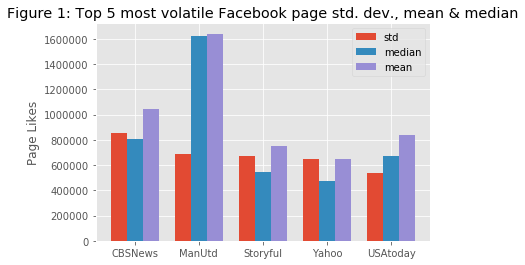

In [168]:
import numpy as np
import matplotlib.pyplot as plt
ypos=np.arange(len(data['mean']))
bar_with=0.25
fig,ax=plt.subplots()
bar_std=ax.bar(ypos-0.25,data['std'],bar_with,label='std')
bar_median=ax.bar(ypos,data['median'],bar_with,label='median')
bar_mean=ax.bar(ypos+0.25,data['mean'],bar_with,label='mean')
username=['CBSNews', 'ManUtd', 'Storyful', 'Yahoo', 'USAtoday']
ax.set_xticks(ypos)
ax.set_xticklabels(username)
plt.ylabel('Page Likes')
ax.legend()
plt.title('Figure 1: Top 5 most volatile Facebook page std. dev., mean & median')
plt.show()

ManUtd pages is examined in more detail. The page is filter based on talking_about_count that is 2 standard deviation from mean value


In [171]:
filt=Group_sort.get_group(7724542745)['talking_about_count']>(1.048189e+06+2*690647.941761)
(Group_sort.get_group(7724542745)[filt]).sort_values(by='talking_about_count',ascending=False)[0:5]

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin,Normalised likes
700188,53470,2016-05-28 04:00:00+00:00,manchesterunited,16268,f,1920547,69484872,4300475,7724542745,NaN,2017-02-14 06:22:59.952652+00,NaN,NaN,NaN,14.073611
1982224,53470,2017-05-28 04:00:00+00:00,manchesterunited,15814,f,2209416,73498440,4088212,7724542745,2017-05-28 11:45:57.139335+00,2017-05-28 11:45:57.139375+00,NaN,NaN,NaN,14.886528
816452,53470,2016-07-08 04:00:00+00:00,manchesterunited,16224,f,1929284,69931029,4068312,7724542745,NaN,2017-02-14 06:23:00.726162+00,NaN,NaN,NaN,14.163977
1629772,53470,2017-03-05 05:00:00+00:00,manchesterunited,15881,f,2110425,72776637,4063030,7724542745,2017-03-05 15:50:21.519281+00,2017-03-05 15:50:21.519324+00,NaN,NaN,NaN,14.740332
1614811,53470,2017-03-02 05:00:00+00:00,manchesterunited,15881,f,2101384,72742365,4047128,7724542745,2017-03-02 19:16:17.648896+00,2017-03-02 19:16:17.648943+00,NaN,NaN,NaN,14.733391


The highest variation from mean occurred on 28 May 2016. Researching from the internet, this day was when ManUtd hired Jose Mourinho as their new head coach. This must attributed high engagement from the United fans.
https://www.nytimes.com/2016/05/28/sports/soccer/manchester-united-hired-jose-mourinho-heres-what-will-happen.html

The second highest variation from mean incidentally occurred one year later (28 May 2017). On this day, ManUtd won the UEFA cup beating Ajax by 2-0. United fans most likely expressing their happiness on the United page.
https://www.bbc.com/sport/football/40004559

The third highest variation from mean occurred on 8 July 2016. On this day, ManUtd announced the signing of Eric Bailly from Villareal. He was not a household name in defense and hardly known by many ManUtd fans. This might has instigated United fans to discuss on his strenghts and weakness on the United page.
https://www.goal.com/en/news/1862/premier-league/2016/06/08/24410152/official-manchester-united-sign-bailly

## 2.0 Facebook likes examination

In [3]:
df2=df

A new column repsenting normalised value for Facebook page likes are created  

In [4]:
likes_mean=df2['likes'].mean()
likes_std=df2['likes'].std()

In [5]:
data2=(df2['likes']-likes_mean)/likes_std
data2=data2-min(data2)

In [6]:
df2['Normalised likes']=data2

In [7]:
df2

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin,Normalised likes
0,53088,2015-01-01 05:00:00+00:00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN,0.154242
1,52642,2015-01-01 05:00:00+00:00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN,0.008799
2,53656,2015-01-01 05:00:00+00:00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN,0.001132
3,53033,2015-01-01 05:00:00+00:00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN,0.249637
4,52783,2015-01-01 05:00:00+00:00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621386,1333153,2018-07-17 04:00:00+00:00,SignatureStyleSalons,0,f,0,400,23,1522066374789370,2018-07-18 05:48:17.266146+00,2018-07-18 05:48:17.26619+00,NaN,NaN,NaN,0.000081
3621387,911424,2018-07-17 04:00:00+00:00,tdr.jp,510211,f,510211,1105124,50882,213982575367704,2018-07-18 05:45:26.29927+00,2018-07-18 05:45:26.299314+00,NaN,NaN,NaN,0.223834
3621388,64854,2018-07-17 04:00:00+00:00,fiberone,0,f,0,576589,429,150319295010117,2018-07-18 05:46:13.456221+00,2018-07-18 05:46:13.456264+00,NaN,NaN,NaN,0.116783
3621389,57960,2018-07-17 04:00:00+00:00,PayPal,0,f,0,5913042,2847,589464587749730,2018-07-18 05:42:55.603128+00,2018-07-18 05:42:55.60317+00,NaN,NaN,NaN,1.197640


First, the absolute **likes** gained between the oldest and latest date for each Facebook pages are calculated.

In [8]:
Group_likes=(df2.sort_values(by='time',ascending=False)).groupby(['facebook_id'])

In [9]:
top10=(Group_likes[['likes']].first()-Group_likes[['likes']].last()).sort_values(by='likes',ascending=False)[0:10]

In [10]:
pagename=[]
for i in (top10.index):
    pagename.append((Group_likes.get_group(i)['username'].head(1)).values[0])
    

In [11]:
pagename=['FB',
 'netflix',
 'org',
 'McD',
 'McDUS',
 'wwe',
 'Spotify',
 'Intel',
 'KFC',
 'Avon']

In [12]:
top10.insert(0,'FB name',pagename)

In [13]:
top10

,FB name,likes
facebook_id,,
20531316728,FB,46823180
475822799216240,netflix,33522967
7558451780,org,19237428
10150097174480584,McD,17256164
50245567013,McDUS,17226714
7175346442,wwe,14864980
6243987495,Spotify,13778512
22707976849,Intel,13766457
7144906559,KFC,12196624


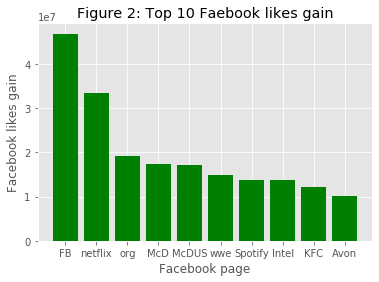

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

x = top10['FB name']
likes = top10['likes']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, likes, color='green')
plt.xlabel("Facebook page")
plt.ylabel("Facebook likes gain")
plt.title("Figure 2: Top 10 Faebook likes gain")

plt.xticks(x_pos, x)

plt.show()

Note: FB=Facebook, org=orange

The absolute **likes** gain does not take into account the existing size of the page as well as the time taken to gain the likes. In order to get a more comparable data, the **likes values are normalised** and then **divided by the time frame** taken to gain those number of likes.    

In [15]:
diff_likes_norm=(Group_likes[['Normalised likes']].first()-Group_likes[['Normalised likes']].last())

In [16]:
diff_time_norm=(Group_likes[['time']].first()-Group_likes[['time']].last()).astype('timedelta64[D]')

In [17]:
x=diff_likes_norm/diff_time_norm.values

In [18]:
top10_norm=x.sort_values(by='Normalised likes',ascending=False)[0:10]


In [19]:
pagename_norm1=[]
for i in (top10_norm.index):
    pagename_norm1.append((Group_likes.get_group(i)['username'].head(1)).values[0])

In [20]:
pagename_norm=['FB',
 'netfx',
 'BkUS',
 'McD',
 'McDUS',
 'org',
 'Bk',
 'KFC',
 'Sptfy',
 'Marvel']

In [21]:
top10_norm.insert(0,'FB name',pagename_norm)


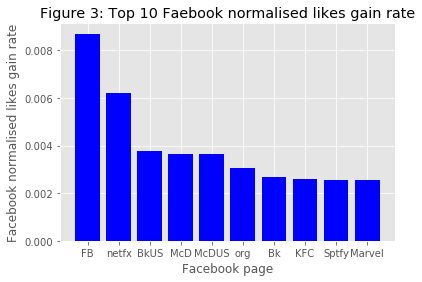

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

x = top10_norm['FB name']
likes = top10_norm['Normalised likes']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, likes, color='blue')
plt.xlabel("Facebook page")
plt.ylabel("Facebook normalised likes gain rate")
plt.title("Figure 3: Top 10 Faebook normalised likes gain rate")

plt.xticks(x_pos, x)

plt.show()

In [23]:
top10_norm

,FB name,Normalised likes
facebook_id,,
20531316728,FB,0.008693
475822799216240,netfx,0.006218
303492549842824,BkUS,0.003781
10150097174480584,McD,0.003637
50245567013,McDUS,0.003635
7558451780,org,0.003044
131840030178250,Bk,0.002658
7144906559,KFC,0.002581
6243987495,Sptfy,0.002572


Note: FB=Facebook,
      netfx=netflix,
      BkUS=BookingcomUS,
      org=orange,
      Bk=Bookingcom,
      Sptfy=Spotify

Analysing Figure 2 and 3, **seven out ten** Facebook pages in top 10 absolute likes gain also made to top 10 normalised likes rate. These pages are **'Facebook', 'netflix', 'orange', 'McD', 'McDUS', 'Spotify', and 'KFC'**.

Those that exist **exclusively** only on top 10 
**absolute likes gain** (Figure 2) are **'wwe', 'intel' and 'avon'**.

Those that exist **exclusively** only on top 10 **normalised likes rate** (Figure 3) are **'BookingcomUS', 'Bookingcom' and 'marvel'**.
 

Next, the top 5 normalised likes rate Facebook pages are plotted against the time scale. Note that, the lastest date of the month and the total like at that time are used to develop the graph.

In [24]:
year=pd.DatetimeIndex(df2['time']).year
month=pd.DatetimeIndex(df2['time']).month
df2['time']=df2['time'].dt.tz_localize(None)
df3=df2


In [25]:
df3['year']=year
df3['month']=month
Group_plot=(df3.sort_values(by='time',ascending=False)).groupby(['facebook_id'])

In [26]:
page_rate=top10_norm.index[0:5]

In [27]:
all_time=[]
all_likes=[]
for i in page_rate:
    xr=Group_plot.get_group(i).groupby(['year','month'])
    all_time.append(xr.head(1)['time'])
    all_likes.append(xr.head(1)['likes'])


In [28]:
x=all_time
min_date=[]
max_date=[]
for i in range(5):
    min_date.append(min(x[i]))
    max_date.append(max(x[i]))
    
Min_final=min(min_date)
Max_final=max(max_date)


In [29]:
pagename_norm1

['facebook',
 'netflix',
 'bookingcomUS',
 'McDonalds',
 'McDonaldsUS',
 'orange',
 'bookingcom',
 'KFC',
 'Spotify',
 'Marvel']

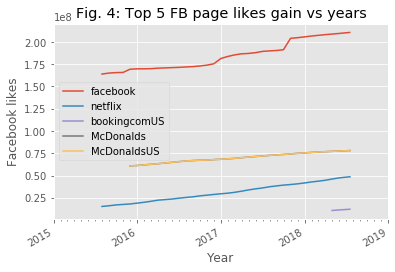

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
for i in range(len(all_time)):
    ax.plot(all_time[i],all_likes[i],label=pagename_norm1[i])


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.legend()
# round to nearest years.
datemin = np.datetime64(Min_final, 'Y')
datemax = np.datetime64(Max_final, 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
plt.xlabel("Year")
plt.ylabel("Facebook likes")
plt.title("Fig. 4: Top 5 FB page likes gain vs years") 
ax.grid(True)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

Note: McDonalds and McDonaldsUS have almost identical growth and FB likes which made their graphs to overlap. 

From Figure 4, it can be seen that the **Facebook** page (red) itself has the **steepest curve**, followed by Netflix (dark blue), bookingcomUS(light blue), and the two McD pages(green; grey is overlapped).

**bookingcomUS** is a new Facebook page started on **20th April 2018** any only have time span of **88 days**. However, they have shown great rate in gaining Facebook likes in its early establishment. 

In [315]:
(Group_likes.get_group(303492549842824)['time'].head(1).values-Group_likes.get_group(303492549842824)['time'].tail(1).values).astype('timedelta64[D]')

array([88], dtype='timedelta64[D]')

In [316]:
Group_likes.get_group(303492549842824)['time'].tail(1)

3411815   2018-04-20 04:00:00+00:00
Name: time, dtype: datetime64[ns, UTC]

## 3.0 Examination of relationship between Facebook likes and Facebook talking about count

Next the top 5 Facebook pages that showed the most likes gained overtime are examined against the talking about count value. The aim here is to find whether there is a corelation between number or likes gained each month vs the talking about count. The number of likes gained each month determined by subtracting the newer month against the latest month likes count. While the average value of each month is used for talking about count value. Using these two values the corellation value is determined.

In [32]:
all_thumb=[]
all_talk=[]
all_corrcoef=[]
for i in range(len(top10_norm[0:5])):
    likes_gain=[]
    for j in range(len(all_likes[i])-1):
        likes_gain.append(all_likes[i].values[j]-all_likes[i].values[j+1])
    talk=(Group_plot.get_group(top10_norm.index[i]).groupby(['year','month'])['talking_about_count'].agg('mean')).values[::-1]
    talk=talk[0:-1]
    all_thumb.append(likes_gain)
    all_talk.append(talk)
    arr = np.array(likes_gain) 
    all_corrcoef.append(np.corrcoef(talk,arr)[0][1])


In [43]:
Coerf=top10_norm[0:5]
Coerf=Coerf.drop(['Normalised likes'],axis=1)
se = pd.Series(all_corrcoef)
Coerf['Correlation']=se.values
Coerf

,FB name,Correlation
facebook_id,,
20531316728,FB,0.073317
475822799216240,netfx,0.250758
303492549842824,BkUS,0.759814
10150097174480584,McD,0.536754
50245567013,McDUS,0.107279


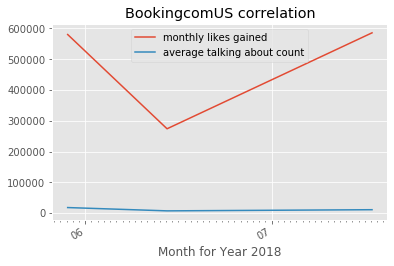

In [72]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
month_fmt = mdates.DateFormatter('%m')

fig, ax = plt.subplots()

ax.plot(all_time[2].values[0:-1],all_thumb[2],label='monthly likes gained')
ax.plot(all_time[2].values[0:-1],all_talk[2],label='average talking about count')


# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_fmt)
ax.xaxis.set_minor_locator(days)
ax.legend()
# round to nearest years.


# format the coords message box
plt.xlabel("Month for Year 2018")

plt.title("BookingcomUS correlation") 
ax.grid(True)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

BookingcomUS has the higest correlation between likes and talking about count. This might explain their high rate in likes gained over time. 